## ISYE6501x Homework 4

### Question 7.1
Describe a situation or problem from your job, everyday life, current events, etc., for which exponential smoothing would be appropriate. What data would you need? Would you expect the value of alpha (the first smoothing parameter) to be closer to 0 or 1, and why?

**Answer:**

Predicitng the electricity load in short-term is very crucial in operating a reliable,stable and economic power system.

Using triple exponential smoothing method (Holtwinters) we can forcast the power load and prepare the grid for it. A value of alpha closer to 1 would be appropriate since the profile of demand in recent observations should have more weight in building forecasting model.



### Question 7.2

Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2 (file temps.txt), build and use an exponential smoothing model to help make a judgment of whether
the unofficial end of summer has gotten later over the 20 years. (Part of the point of this assignment is for you to think about how you might use exponential smoothing to answer this question. Feel free to combine it with other models if you’d like to. There’s certainly more than one reasonable approach.)
Note: in R, you can use either HoltWinters (simpler to use) or the smooth package’s es function
(harder to use, but more general). If you use es, the Holt-Winters model uses model=”AAM” in the
function call (the first and second constants are used “A”dditively, and the third (seasonality) is used
“M”ultiplicatively; the documentation doesn’t make that clear). 

### Installing Packages and Loading Libraries

In [86]:
options(warn=-1) #suppressing warnings

In [88]:
install.packages(c('IRkernel', 'IRdisplay', 'repr'))

Installing packages into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'IRkernel' successfully unpacked and MD5 sums checked
package 'IRdisplay' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpmCDXAT\downloaded_packages


In [90]:
library(IRkernel)

In [21]:
install.packages("survMisc")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'survMisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpmCDXAT\downloaded_packages


In [22]:
install.packages("forecast")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpmCDXAT\downloaded_packages


In [46]:
install.packages("ggfortify")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


In [50]:
library(forecast)


Attaching package: 'forecast'

The following object is masked from 'package:survMisc':

    autoplot



In [25]:
library(ggplot2)

In [26]:
library(survMisc)

Loading required package: survival

Attaching package: 'survMisc'

The following object is masked from 'package:forecast':

    autoplot

The following object is masked from 'package:ggplot2':

    autoplot



In [27]:
library(tidyverse)

In [158]:
library(reshape)


Attaching package: 'reshape'

The following object is masked from 'package:lubridate':

    stamp

The following object is masked from 'package:dplyr':

    rename

The following objects are masked from 'package:tidyr':

    expand, smiths



In [47]:
library(ggfortify)

In [148]:
library(lubridate)

### Answer:

The Holt-Winters forecasting algorithm allows users to smooth a time series and use that data to forecast areas of interest. Exponential smoothing assigns exponentially decreasing weights and values against historical data to decrease the value of the weight for the older data. In other words, more recent historical data is assigned more weight in forecasting than the older results.

There are three types of exponential smoothing:

- Single(simple) exponential smoothing: This method is suitable for forecasting data with no clear trend or seasonal pattern.
- Double (Holt’s linear trend) exponential smoothing: This method employs a level component and a trend component at each period.
- Triple (Holt-Winters seasonal) exponential smoothing: This method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for the trend bt,and one for the seasonal component st,with corresponding smoothing parameters α, β∗ and γ. 

In order to see which method is more suitable for our data, first we get help from visualizing data to see data's behavior.




In [51]:
#Loading the data
temps=read_tsv("temps.txt")

Parsed with column specification:
cols(
  .default = col_double(),
  DAY = col_character()
)
See spec(...) for full column specifications.


In [52]:
#checking the data
head(temps)[1:3,]

DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1-Jul,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79


In [53]:
#converting data frame to time series object
data<-ts(as.vector(unlist(temps[,2:21])),start=1996,frequency=123)

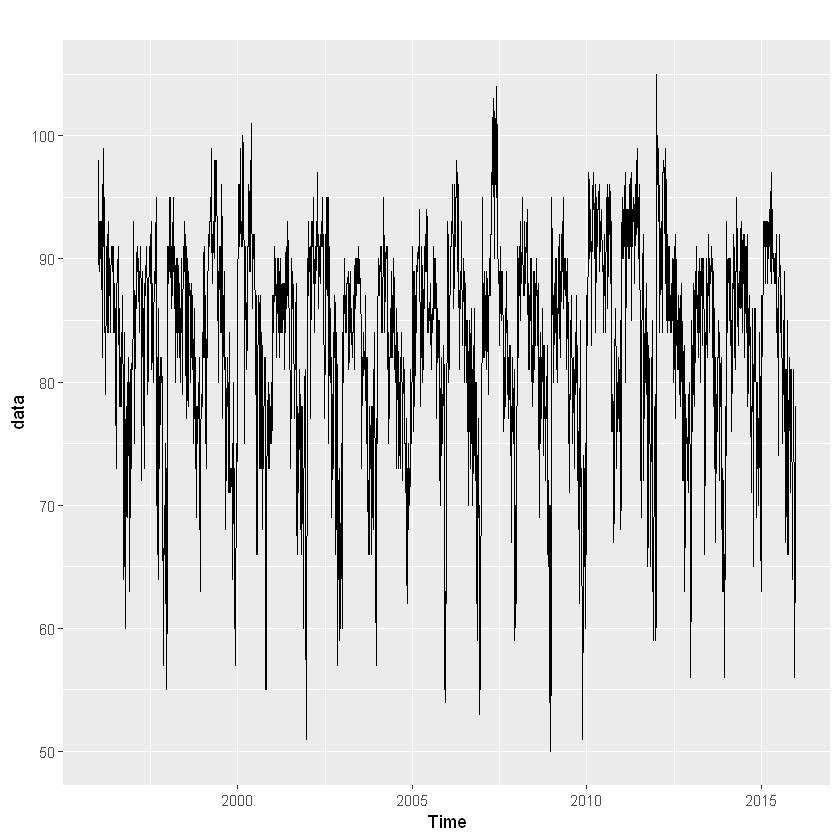

In [57]:
#exploring behaviour of data
autoplot(data)

Looking at data, we observe there is seasonality.The triple( Holt-Winters) method seems to be a good method to use.

We will build a model using Holtwinters() in R and extract the trend component to see if there is any trend (summers getting warmer) or any change in seasonality( summers getting longer).

In [10]:
#HoltWinters(x, alpha = NULL, beta = NULL, gamma = NULL, seasonal = c("additive", "multiplicative"),
#             start.periods = 2, l.start = NULL, b.start = NULL,
#             s.start = NULL,
#             optim.start = c(alpha = 0.3, beta = 0.1, gamma = 0.1),
#             optim.control = list())

We can decompose a time series into three components (trend,seosonal, and level(residual) to understand the underlying pattern.
There are two important decomposition methods:

- Multiplicative : Time series is modeled as the product of the four components : yt=Tt* St* Ct* It
- Additive: Time series is modeled as sum of four component: yt=Tt+St+Ct+It

The additive decomposition method is more suitable when seasonal factors are steady from one year to another. But many economic time series are multiplicative rather than linear where seasonal factor grows proportionaly with the level of the time series.

Here, the additive method might work better. However, we will build 2 models to see th result and do a comparison.




In [76]:
set.seed(1)
#Holtwinter, using additive decomposition
HW_A<- HoltWinters(data,seasonal="additive")
        

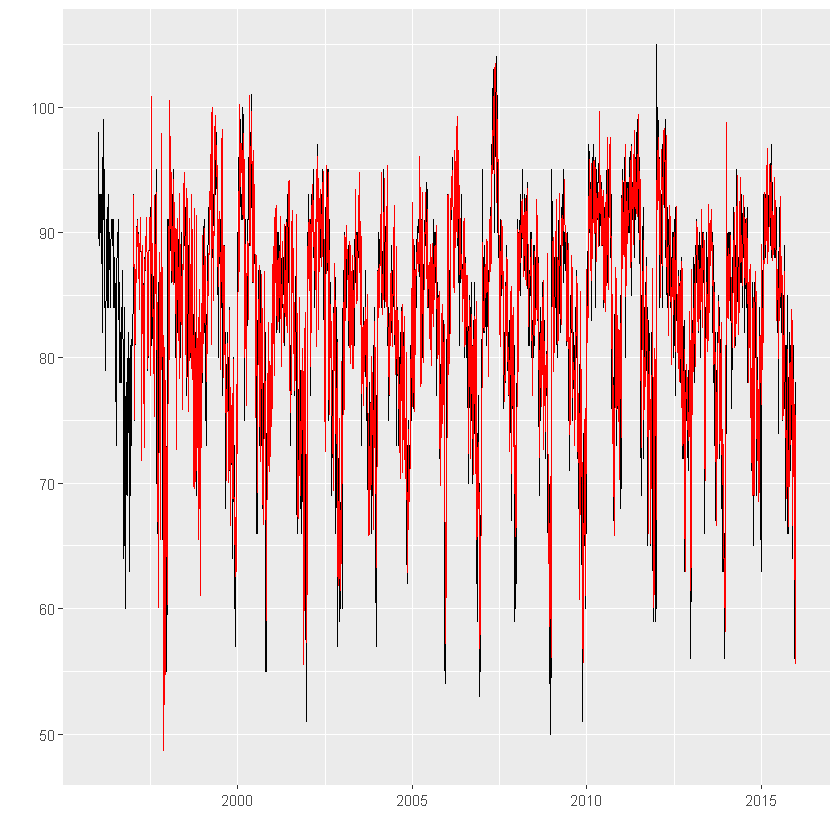

In [77]:
autoplot(HW_A)

In [265]:
set.seed(1)
#Holtwinter, using multiplicative decomposition
HW_M<- HoltWinters(data, seasonal="multiplicative")

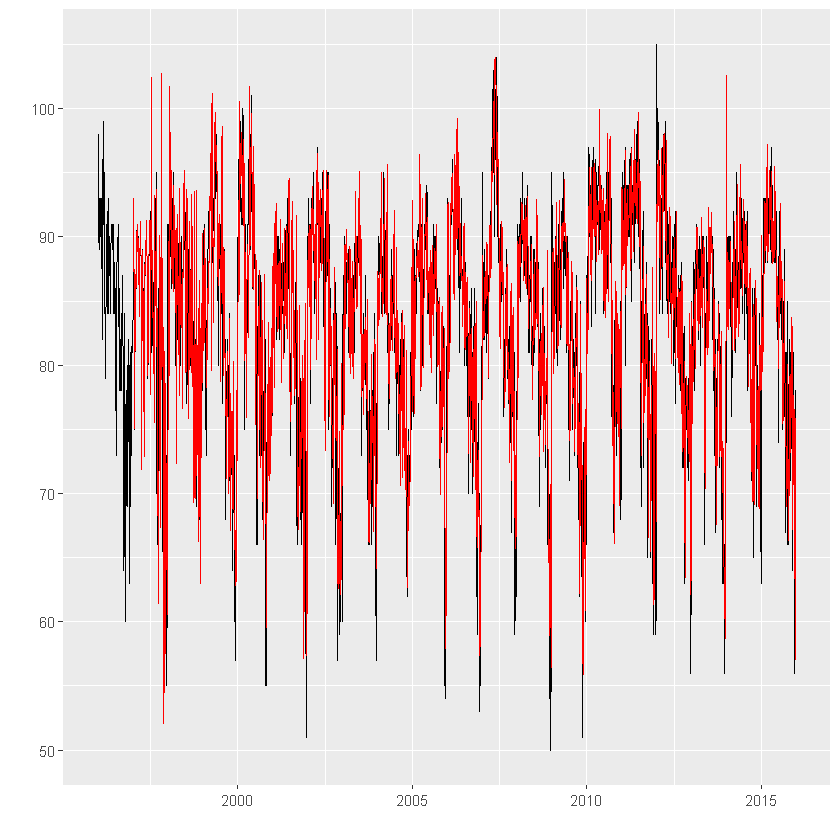

In [266]:
autoplot(HW_M)

In [78]:
cat("Using additive method:\n")
cat("\tBase factor:", HW_A$alpha,"\n")
cat("\tTrend factor:",HW_A$beta,"\n")
cat("\tSeasonal factor:",HW_A$gamma,"\n")
cat("\tSum of Squared Errors:", HW_A$SSE)

Using additive method:
	Base factor: 0.6610618 
	Trend factor: 0 
	Seasonal factor: 0.6248076 
	Sum of Squared Errors: 66244.25

In [267]:
cat("For multiplicative method:\n")
cat("\tBase factor:", HW_M$alpha,"\n")
cat("\tTrend factor:",HW_M$beta,"\n")
cat("\tSeasonal factor:",HW_M$gamma,"\n")
cat("\tSum of Squared Errors:", HW_M$SSE)

For multiplicative method:
	Base factor: 0.615003 
	Trend factor: 0 
	Seasonal factor: 0.5495256 
	Sum of Squared Errors: 68904.57

Below is the Holt-Winters decomposition of time-series.The xhat represents the raw(fitted) data, and is followed by the decomposed components in each plot.

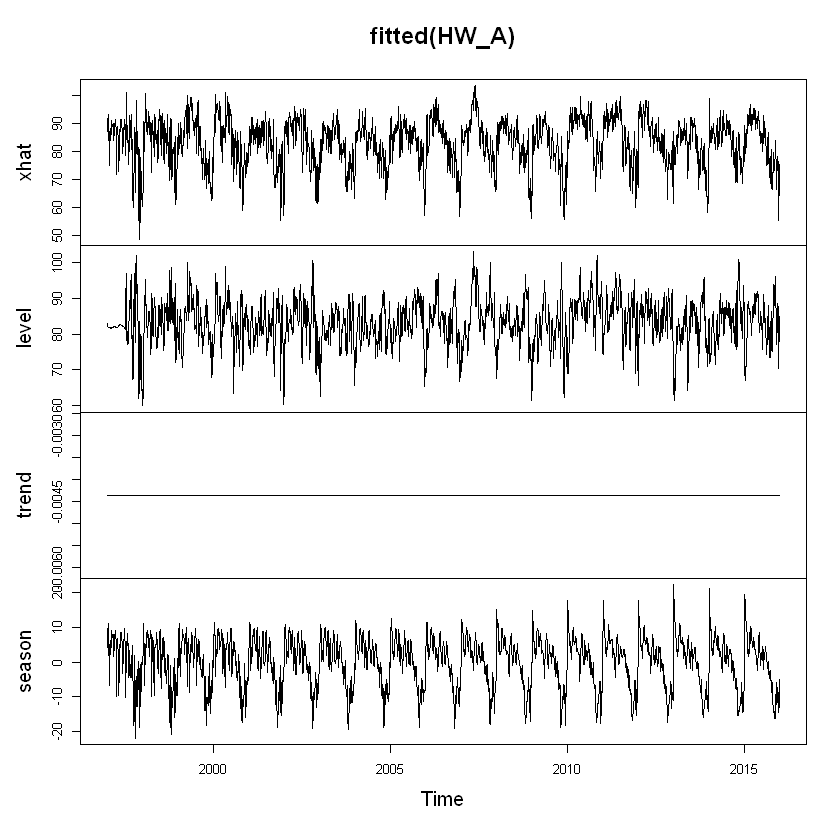

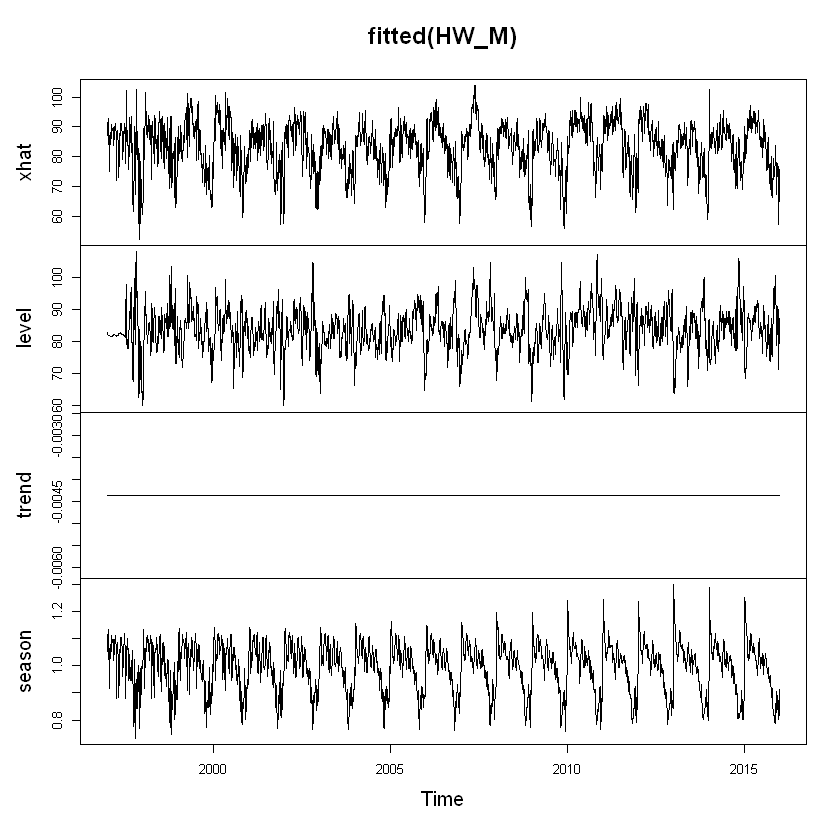

In [268]:
par(mfrow=c(1,2))
plot(fitted(HW_A))
plot(fitted(HW_M))

Since additive method results in a smaller sum of squared, we will pick that for our analysis.

In [93]:
HW_A$fitted[1:5,]

xhat,level,trend,season
87.17619,82.87739,-0.004362918,4.303159
90.32925,82.09550,-0.004362918,8.238119
92.96089,81.87348,-0.004362918,11.091777
90.93360,81.89497,-0.004362918,9.042997
83.99752,81.93450,-0.004362918,2.067387


#### Result:
 If we inspect the plot of fitted model visually, we can see that the length of seasons are not getting wider as years go by. The duration of warm season is staying pretting constant.

To explore further, we can perform cusum method to see if we can use Holtwinters model's components to detect change.
We will pick fitted values, xhat and seasonal component for out calculations.


### First, we try CUSUM using seasonal factors:

In [184]:
season <- matrix(HW_A$fitted[,4],ncol=123)

In [185]:
head(season)

4.303159,7.896655,-2.493588,8.132428,3.4251107,-12.192775,-12.6480600,2.284850,6.239628,6.6517207,...,1.8817396,2.7973275,-7.384007,-6.731199,4.594863,4.229417,2.351232,1.784854,-4.558808,-14.105770
8.238119,6.766574,-9.574889,8.343810,-0.5748893,-16.176515,-8.5667592,6.318137,-9.901430,6.6256258,...,1.1980662,2.5782433,-4.781048,-10.324733,2.398748,7.180348,6.424048,1.580458,-3.088859,-16.322937
11.091777,1.677143,-2.656190,9.490151,-0.5179787,-18.135865,-8.4935885,4.338100,-1.984170,5.6101678,...,-0.2425926,0.3037505,-6.456080,-11.314989,4.734543,4.587807,7.136208,1.309686,-2.716105,-16.169481
9.042997,4.766574,3.238119,9.620233,-4.4691982,-22.103345,-6.4935885,8.285123,1.990683,-0.3353284,...,2.9354693,-2.8434214,-7.796781,-14.441652,2.474585,5.996550,8.335971,0.883261,-2.276560,-12.230328
2.067387,5.799094,5.156818,2.770639,-3.4122877,-4.046434,-6.4854584,9.225205,6.040869,-3.2044010,...,0.9624345,-1.7724418,-13.752436,-9.707349,3.562329,6.522292,8.632628,1.957987,-4.599660,-9.335535
2.116168,6.815355,5.099907,-3.152125,-3.3391169,-12.013914,-0.5342389,9.200351,6.997307,-1.1412182,...,5.2063254,0.2441455,-15.460074,-10.375104,1.729221,5.832260,7.564373,3.625247,-5.251089,-10.575347


In [186]:
dim(season)

[1]  19 123

The data for year 1996 is not present in seasonality data.

In [187]:
#Adding row names and columns to xhat data
colnames(season)<-as.vector(t(temps[,1]))
rownames(season)<-c(1997:2015)


In [188]:
head(season)

,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,...,22-Oct,23-Oct,24-Oct,25-Oct,26-Oct,27-Oct,28-Oct,29-Oct,30-Oct,31-Oct
1997,4.303159,7.896655,-2.493588,8.132428,3.4251107,-12.192775,-12.6480600,2.284850,6.239628,6.6517207,...,1.8817396,2.7973275,-7.384007,-6.731199,4.594863,4.229417,2.351232,1.784854,-4.558808,-14.105770
1998,8.238119,6.766574,-9.574889,8.343810,-0.5748893,-16.176515,-8.5667592,6.318137,-9.901430,6.6256258,...,1.1980662,2.5782433,-4.781048,-10.324733,2.398748,7.180348,6.424048,1.580458,-3.088859,-16.322937
1999,11.091777,1.677143,-2.656190,9.490151,-0.5179787,-18.135865,-8.4935885,4.338100,-1.984170,5.6101678,...,-0.2425926,0.3037505,-6.456080,-11.314989,4.734543,4.587807,7.136208,1.309686,-2.716105,-16.169481
2000,9.042997,4.766574,3.238119,9.620233,-4.4691982,-22.103345,-6.4935885,8.285123,1.990683,-0.3353284,...,2.9354693,-2.8434214,-7.796781,-14.441652,2.474585,5.996550,8.335971,0.883261,-2.276560,-12.230328
2001,2.067387,5.799094,5.156818,2.770639,-3.4122877,-4.046434,-6.4854584,9.225205,6.040869,-3.2044010,...,0.9624345,-1.7724418,-13.752436,-9.707349,3.562329,6.522292,8.632628,1.957987,-4.599660,-9.335535
2002,2.116168,6.815355,5.099907,-3.152125,-3.3391169,-12.013914,-0.5342389,9.200351,6.997307,-1.1412182,...,5.2063254,0.2441455,-15.460074,-10.375104,1.729221,5.832260,7.564373,3.625247,-5.251089,-10.575347


In [189]:
#transposing xhat to be able to use homework 3 functions and prodecures
season<-t(season)

In [239]:
tail(season)


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
26-Oct,4.594863,2.398748,4.734543,2.474585,3.562329,1.729221,2.963993,6.1617888,4.9642385,8.4888275,5.396697,10.3475617,10.132140,9.7119924,7.762740,7.2592883,6.393069,5.8999187,5.7717276
27-Oct,4.229417,7.180348,4.587807,5.996550,6.522292,5.832260,3.676858,3.9638066,3.5715531,2.8544750,2.115263,2.6367990,1.704358,0.2398016,0.106239,-1.4964109,-2.176732,-2.3581247,0.3313898
28-Oct,2.351232,6.424048,7.136208,8.335971,8.632628,7.564373,4.915796,0.5495608,-0.9733753,1.6163475,1.677363,0.8611871,2.849256,0.5048845,4.365206,4.4810004,3.012644,3.7928937,-2.1404589
29-Oct,1.784854,1.580458,1.309686,0.883261,1.957987,3.625247,4.613873,4.4851461,1.6616995,0.7696508,2.361848,1.9836291,-1.606642,-1.7908999,-0.400013,0.1019151,-1.072244,-0.9699143,-2.7687440
30-Oct,-4.558808,-3.088859,-2.716105,-2.276560,-4.599660,-5.251089,-4.467081,-5.7668367,-7.4080386,-8.8197985,-8.571026,-6.1143737,-5.913719,-11.0049498,-13.319209,-13.4601826,-14.259795,-15.1073129,-14.4557108
31-Oct,-14.105770,-16.322937,-16.169481,-12.230328,-9.335535,-10.575347,-12.280703,-9.8827456,-5.9204277,-8.0541265,-9.587651,-10.4309896,-12.843656,-8.6849941,-9.886253,-14.6457515,-12.026808,-8.9339468,-4.9410841


In [242]:
#creating a data frame to store the cusum values for each year
cusum_df<-data.frame(matrix(nrow=nrow(season),ncol=ncol(season)))

In [243]:
#assigning columns names to cusum data frame
colnames(cusum_df)<-colnames(season)
rownames(cusum_df)<-rownames(season)


In [251]:
head(rownames_to_column(cusum_df,var="Day"))

Day,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [255]:
#using Zero start method
#calculating cusum values for each year
for(y in 2:ncol(cusum_df)){
    cusum_df[1,y]<-0 #initial St value for each column,set to zero
    mu<-mean(season[1:31,y-1]) #mean of july 
    std<-sd(season[1:31,y-1]) #sd of july 
    threshold<-4*std #using 4 sd as threshold value,different T for each year 
    change<-NULL # to store dates with St over threshold,first value:first day change detected
    
    for(i in 2:nrow(cusum_df)){
        cusum_df[i,y]<-max(0,cusum_df[i-1,y]+(mu-season[i,y]-std))
        if (cusum_df[i,y]>=threshold){
            change<-append(change,cusum_df[i,y])}}
    if (length(change)==0){
        cat("Year",colnames(cusum_df[y]),":No Change detected.\n")
    }else{
        cat("In year of",colnames(cusum_df[y]),"the day Summer started is:",
        cusum_df[which(cusum_df[,y]==change[1]),"Day"],"\n")}
    
}

Year 1998 :No Change detected.
Year 1999 :No Change detected.
Year 2000 :No Change detected.
Year 2001 :No Change detected.
Year 2002 :No Change detected.
Year 2003 :No Change detected.
Year 2004 :No Change detected.
Year 2005 :No Change detected.
Year 2006 :No Change detected.
Year 2007 :No Change detected.
Year 2008 :No Change detected.
Year 2009 :No Change detected.
Year 2010 :No Change detected.
Year 2011 :No Change detected.
Year 2012 :No Change detected.
Year 2013 :No Change detected.
Year 2014 :No Change detected.
Year 2015 :No Change detected.


**Result:**
No change is detected using these values. Further analysis is needed to understand these results which is out of scope for now.

### Next, we try using fitted values:

In [256]:
xhat <- matrix(HW_A$fitted[,1],ncol=123)

In [257]:
colnames(xhat)<-as.vector(t(temps[,1]))
rownames(xhat)<-c(1997:2015)

In [258]:
xhat<-t(xhat)

In [259]:
cusum_df2<-data.frame(matrix(nrow=nrow(xhat),ncol=ncol(xhat)))

In [260]:
#assigning columns names to cusum data frame
colnames(cusum_df2)<-colnames(xhat)
rownames(cusum_df2)<-rownames(xhat)

In [261]:
head(rownames_to_column(cusum_df2,var="Day"))

Day,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6-Jul,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [264]:
#using Zero start method
#calculating cusum values for each year
for(y in 2:ncol(cusum_df2)){
    cusum_df2[1,y]<-0 #initial St value for each column,set to zero
    mu<-mean(xhat[1:31,y-1]) #mean of july 
    std<-sd(xhat[1:31,y-1]) #sd of july 
    threshold<-4*std #using 4 sd as threshold value,different T for each year 
    change<-NULL # to store dates with St over threshold,first value:first day change detected
    
    for(i in 2:nrow(cusum_df2)){
        cusum_df2[i,y]<-max(0,cusum_df2[i-1,y]+(mu-xhat[i,y]-std))
        if (cusum_df2[i,y]>=threshold){
            change<-append(change,cusum_df2[i,y])}}
    if (length(change)==0){
        cat("Year",colnames(cusum_df2[y]),":No Change detected.\n")
    }else{
        cat("In year of",colnames(cusum_df2[y]),"the day Summer started is:",
        cusum_df2[which(cusum_df2[,y]==change[1]),"Day"],"\n")}
    
}

Year 1998 :No Change detected.
Year 1999 :No Change detected.
Year 2000 :No Change detected.
Year 2001 :No Change detected.
Year 2002 :No Change detected.
Year 2003 :No Change detected.
Year 2004 :No Change detected.
Year 2005 :No Change detected.
Year 2006 :No Change detected.
Year 2007 :No Change detected.
Year 2008 :No Change detected.
Year 2009 :No Change detected.
Year 2010 :No Change detected.
Year 2011 :No Change detected.
Year 2012 :No Change detected.
Year 2013 :No Change detected.
Year 2014 :No Change detected.
Year 2015 :No Change detected.


**Result:**
Again,no change is detected using these values. Further analysis is needed to understand these results which is out of scope for now.